In [ ]:
# Define functions to connect to Google and change directories
def connectDrive():
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)

def changeDirectory(path):
    import os
    original_path = os.getcwd()
    os.chdir(path)
    new_path = os.getcwd()
    print("Original path: ",original_path)
    print("New path: ",new_path)

# Connect to Google Drive
connectDrive()

# Change path
changeDirectory("/content/drive/MyDrive/ML/datasets/")

MessageError: ignored

In [ ]:
#Parte 1
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import numpy

In [ ]:
# Establecer una senilla fija, para permitir la reproducción del proceso
seed = 7
numpy.random.seed(seed)

In [ ]:
# Cargar Dataset
dataset = numpy.loadtxt("/content/drive/MyDrive/ML/datasets/pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

In [ ]:
Y

array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0.

In [ ]:
# crear modelo
model = Sequential()
model.add(Dense(12, input_dim=8, kernel_initializer='uniform' , activation= 'relu' ))
model.add(Dense(8, kernel_initializer='uniform' , activation= 'relu' ))
model.add(Dense(1, kernel_initializer='uniform' , activation= 'sigmoid' ))
#parte 1.2
model.add(Dense(8, kernel_initializer='uniform' , activation= 'softmax' ))
model.add(Dense(1, kernel_initializer='uniform' , activation= 'tanh' ))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 12)                108       
                                                                 
 dense_14 (Dense)            (None, 8)                 104       
                                                                 
 dense_15 (Dense)            (None, 1)                 9         
                                                                 
 dense_16 (Dense)            (None, 8)                 16        
                                                                 
 dense_17 (Dense)            (None, 1)                 9         
                                                                 
Total params: 246
Trainable params: 246
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Comlilar modelo
model.compile(loss= 'binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])
#Entrenar el modelo
model.fit(X,Y, epochs=250, batch_size=10)
#Parte1.1
#model.fit(X,Y, epochs=100, batch_size=10)
#model.fit(X,Y, epochs=450, batch_size=10)
#model.fit(X,Y, epochs=600, batch_size=10)

Epoch 1/250
77/77 [==============================] - 1s 3ms/step - loss: 5.3827 - accuracy: 0.6510
Epoch 2/250
77/77 [==============================] - 0s 3ms/step - loss: 5.3827 - accuracy: 0.6510
Epoch 3/250
77/77 [==============================] - 0s 3ms/step - loss: 5.3827 - accuracy: 0.6510
Epoch 4/250
77/77 [==============================] - 0s 3ms/step - loss: 5.3827 - accuracy: 0.6510
Epoch 5/250
77/77 [==============================] - 0s 3ms/step - loss: 5.3827 - accuracy: 0.6510
Epoch 6/250
77/77 [==============================] - 0s 3ms/step - loss: 5.3827 - accuracy: 0.6510
Epoch 7/250
77/77 [==============================] - 0s 3ms/step - loss: 5.3827 - accuracy: 0.6510
Epoch 8/250
77/77 [==============================] - 0s 3ms/step - loss: 5.3827 - accuracy: 0.6510
Epoch 9/250
77/77 [==============================] - 0s 3ms/step - loss: 5.3827 - accuracy: 0.6510
Epoch 10/250
77/77 [==============================] - 0s 3ms/step - loss: 5.3827 - accuracy: 0.6510
Epoch 11/

In [ ]:
# Evaluar el Modelo
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

24/24 [==============================] - 0s 2ms/step - loss: 5.3827 - accuracy: 0.6510
accuracy: 65.10%


In [ ]:
#Parte 2
from tensorflow.keras.datasets import mnist

In [ ]:
# se carga el dataset MNIST, utilizado para la clasificación de numeros escritos a mano
# se divide enseguida en conjuntos de Train y Test
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print ("Cantidad de Instancias de entrenamiento y sus dimensiones altoy ancho", X_train.shape)

y_train.shape

11501568/11490434 [==============================] - 0s 0us/step
Cantidad de Instancias de entrenamiento y sus dimensiones altoy ancho (60000, 28, 28)


(60000,)

In [ ]:
print ("Cantidad de Instancias de test y sus dimensiones altoy ancho", X_test.shape)

Cantidad de Instancias de test y sus dimensiones altoy ancho (10000, 28, 28)


In [ ]:
y_test.shape

(10000,)

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt

import seaborn as sns

sns.set(font_scale=2)

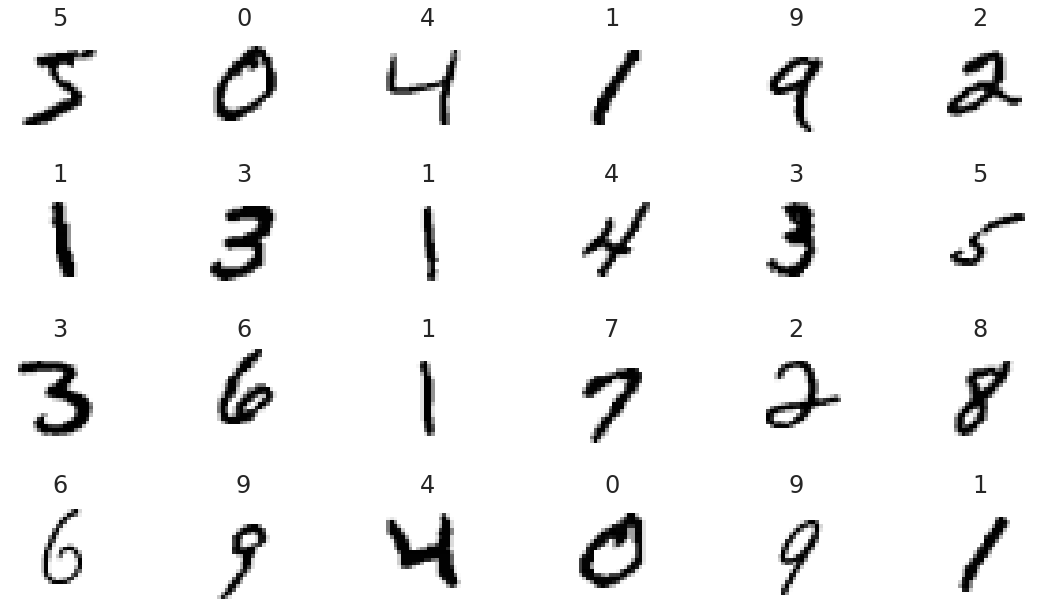

In [ ]:
#Se imprime parte del dataset 
import numpy as np
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))

for item in zip(axes.ravel(), X_train, y_train):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(target)
plt.tight_layout()

In [ ]:
# El dataset MNIST Tiene información de alto y ancho para cada imagen (28,28)
# pero el shape de los datos que recibe las redes en TF debe indicar tambien 
# la cantidad de canales de color que posee la imagen. Por lo cual se añade 
# una nueva dimensión para el color a cada uno de los datos indicando que
# contendrá solo una dimensión con un solo canal, ya que MNIST contiene imagenes en 
# escala de grises. Cuando sean imagenes a color esta dimensión debe tener 
# 3 atributos (canales) para cada canal (RGB).
X_train = X_train.reshape((60000, 28, 28, 1)) 

X_train.shape

(60000, 28, 28, 1)

In [ ]:
#Se hace la división /255 ya que es el maximo tamaño de un byte, el cual es el
#tipo de dato antes de la conversión, esto se hace para mantener los valores 
#en una escala entre 0 y 1 de tal manera que los hiperparametros establecidos 
#por defecto, trabaje mejor al estar en los rangos definidos.
X_train = X_train.astype('float32') / 255

X_test = X_test.reshape((10000, 28, 28, 1))

In [ ]:
X_test.shape

(10000, 28, 28, 1)

In [ ]:
X_test = X_test.astype('float32') / 255

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train = to_categorical(y_train)
y_train.shape

(60000, 10)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
y_test = to_categorical(y_test)

y_test.shape

(10000, 10)

In [ ]:
from tensorflow.keras.models import Sequential

# Creando nuestro modelo secuencial
cnn = Sequential()
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', 
               input_shape=(28, 28, 1)))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
#parte 2.1
#cnn.add(Conv2D(filters=254, kernel_size=(3, 3), activation='relu'))
#cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.add(Dense(units=128, activation='relu'))
cnn.add(Dense(units=10, activation='softmax'))

In [ ]:
# Imprimiendo un resumen de las capas de nuestra CNN
cnn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3200)              0         
                                                                 
 dense_20 (Dense)            (None, 128)              

In [ ]:
# Imprimir el Diseño de la Red  
# Funciona en Linux, Paa Windows hay que meter los binarios de Graphviz en el path
#from tensorflow.keras.utils import plot_model
#from IPython.display import Image
#plot_model(cnn, to_file='convnet.png', show_shapes=True, show_layer_names=True)
#Image(filename='convnet.png') 

In [ ]:
cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])
#Entrenar el modelo
cnn.fit(X_train, y_train, epochs=5, batch_size=64,
        validation_split=0.1)


Epoch 1/5
844/844 [==============================] - 5s 5ms/step - loss: 0.1414 - accuracy: 0.9560 - val_loss: 0.0477 - val_accuracy: 0.9862
Epoch 2/5
844/844 [==============================] - 4s 5ms/step - loss: 0.0441 - accuracy: 0.9865 - val_loss: 0.0422 - val_accuracy: 0.9870
Epoch 3/5
844/844 [==============================] - 4s 5ms/step - loss: 0.0297 - accuracy: 0.9905 - val_loss: 0.0451 - val_accuracy: 0.9875
Epoch 4/5
844/844 [==============================] - 4s 5ms/step - loss: 0.0208 - accuracy: 0.9936 - val_loss: 0.0382 - val_accuracy: 0.9898
Epoch 5/5
844/844 [==============================] - 4s 5ms/step - loss: 0.0156 - accuracy: 0.9952 - val_loss: 0.0325 - val_accuracy: 0.9913


In [ ]:
y_test.shape

(10000, 10)

In [ ]:
loss, accuracy = cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0268 - accuracy: 0.9907


In [ ]:
loss

0.026767879724502563

In [ ]:
accuracy

0.9907000064849854

In [ ]:
predictions = cnn.predict(X_test)

y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability:.10%}')

0: 0.0000038837%
1: 0.0000000451%
2: 0.0000880175%
3: 0.0000284076%
4: 0.0000000040%
5: 0.0000002984%
6: 0.0000000000%
7: 99.9998688698%
8: 0.0000012593%
9: 0.0000158853%


In [ ]:
images = X_test.reshape((10000, 28, 28))
incorrect_predictions = []

for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)
    if predicted != expected:
        incorrect_predictions.append((i, images[i], predicted, expected))

len(incorrect_predictions)

111

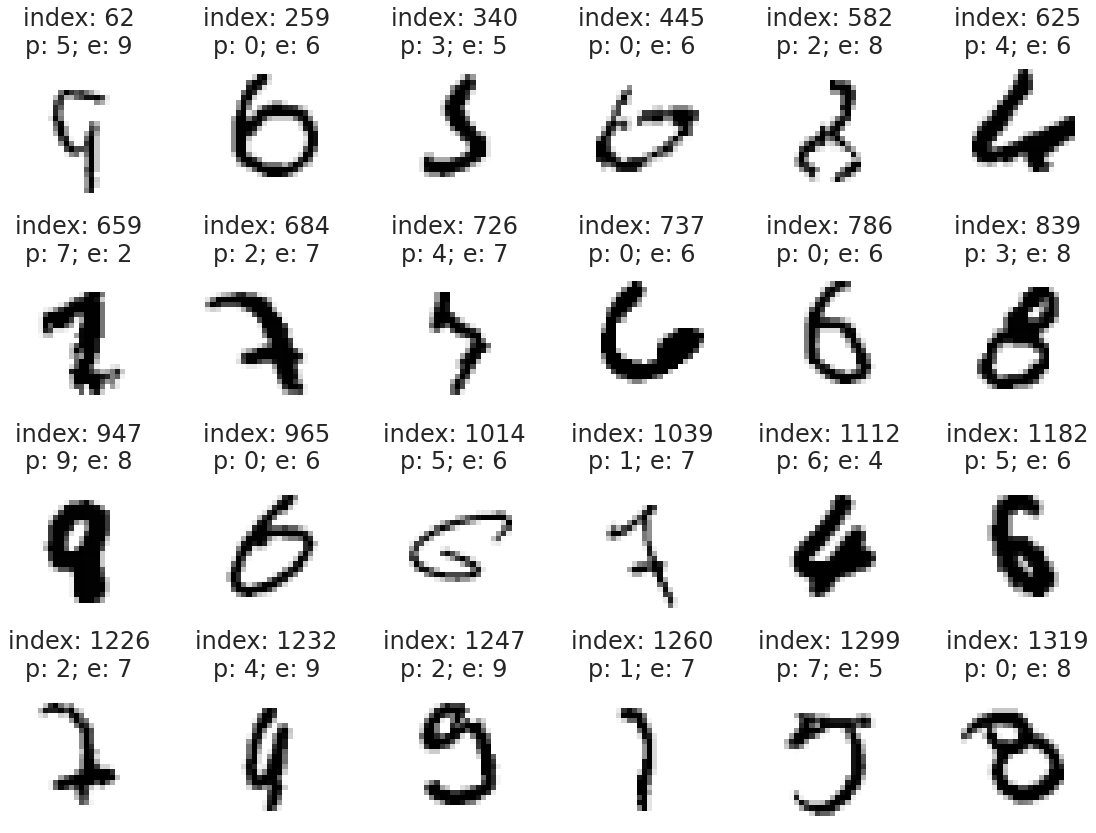

In [ ]:
# Visualizando los errores del modelo
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))

for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(f'index: {index}\np: {predicted}; e: {expected}')
plt.tight_layout()

In [ ]:
def display_probabilities(prediction):
    for index, probability in enumerate(prediction):
        print(f'{index}: {probability:.10%}')

In [ ]:
display_probabilities(predictions[495])

0: 6.5112948418%
1: 0.0001747350%
2: 1.1984374374%
3: 0.0791282975%
4: 0.0000571165%
5: 0.0286565803%
6: 0.6066410337%
7: 0.0000002307%
8: 91.5735125542%
9: 0.0020959074%


In [ ]:
display_probabilities(predictions[583])


0: 0.0000001372%
1: 0.0000021260%
2: 94.6373701096%
3: 0.0278684107%
4: 0.0000000029%
5: 0.0000000368%
6: 0.0000000001%
7: 5.2931528538%
8: 0.0416071154%
9: 0.0000000459%


In [ ]:
display_probabilities(predictions[2018])

0: 0.1179663814%
1: 90.1292502880%
2: 5.8656260371%
3: 0.0333846867%
4: 0.0009753508%
5: 0.0002698052%
6: 0.0000231475%
7: 3.7306353450%
8: 0.1193646807%
9: 0.0025079356%


In [ ]:
#Guardar el modelo
cnn.save('mnist_cnn.h5')

In [ ]:
# Cargar el modelo
from tensorflow.keras.models import load_model

model = load_model('mnist_cnn.h5')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 128)               4

In [ ]:
#generar matriz de confución
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
predicted = []
expected = []
for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted.append(np.argmax(p))
    expected.append(np.argmax(e))
       
    
confusion = confusion_matrix(y_true=expected, y_pred=predicted)
confusion

array([[ 976,    1,    0,    0,    1,    0,    0,    1,    1,    0],
       [   0, 1135,    0,    0,    0,    0,    0,    0,    0,    0],
       [   1,    0, 1027,    1,    0,    0,    0,    2,    1,    0],
       [   0,    1,    2, 1004,    0,    2,    0,    0,    1,    0],
       [   0,    0,    0,    0,  980,    0,    1,    0,    0,    1],
       [   2,    0,    0,    6,    0,  882,    1,    1,    0,    0],
       [  17,    2,    0,    0,    4,    5,  929,    0,    1,    0],
       [   0,    5,    6,    0,    1,    0,    0, 1011,    1,    4],
       [   8,    0,    3,    2,    1,    1,    0,    1,  957,    1],
       [   3,    2,    2,    1,    8,    3,    0,    0,    2,  988]])

In [ ]:
confusion_df = pd.DataFrame(confusion, index=range(10), columns=range(10))  #mnist.load_data().target_names

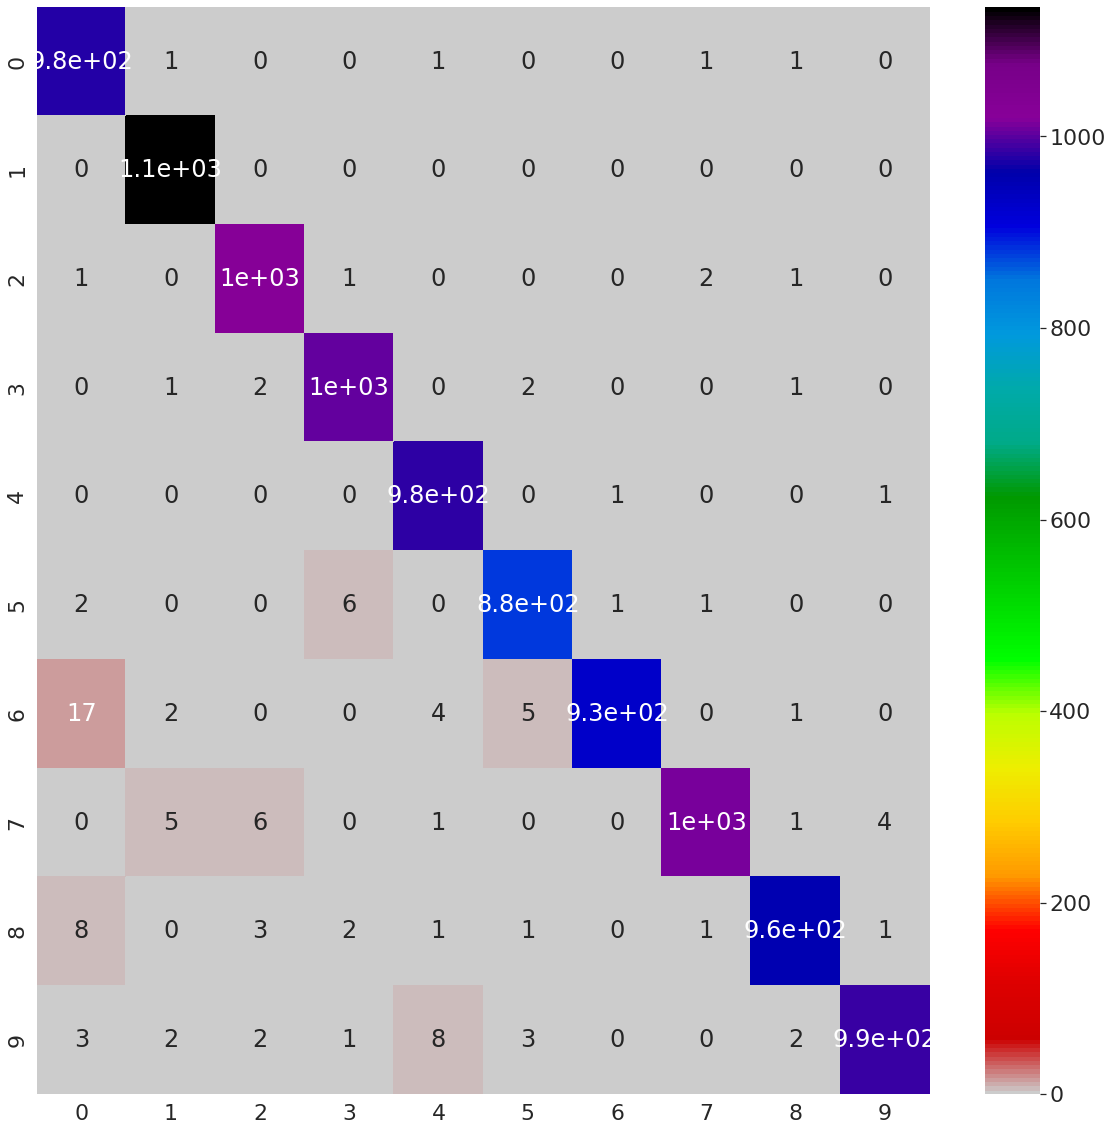

In [ ]:
fig, ax = plt.subplots(figsize=(20,20)) 
axes = sns.heatmap(confusion_df, annot=True, cmap='nipy_spectral_r')
plt.show()

Text(0.5, 0.98, 'Confusion Matrix Con SkLearn')

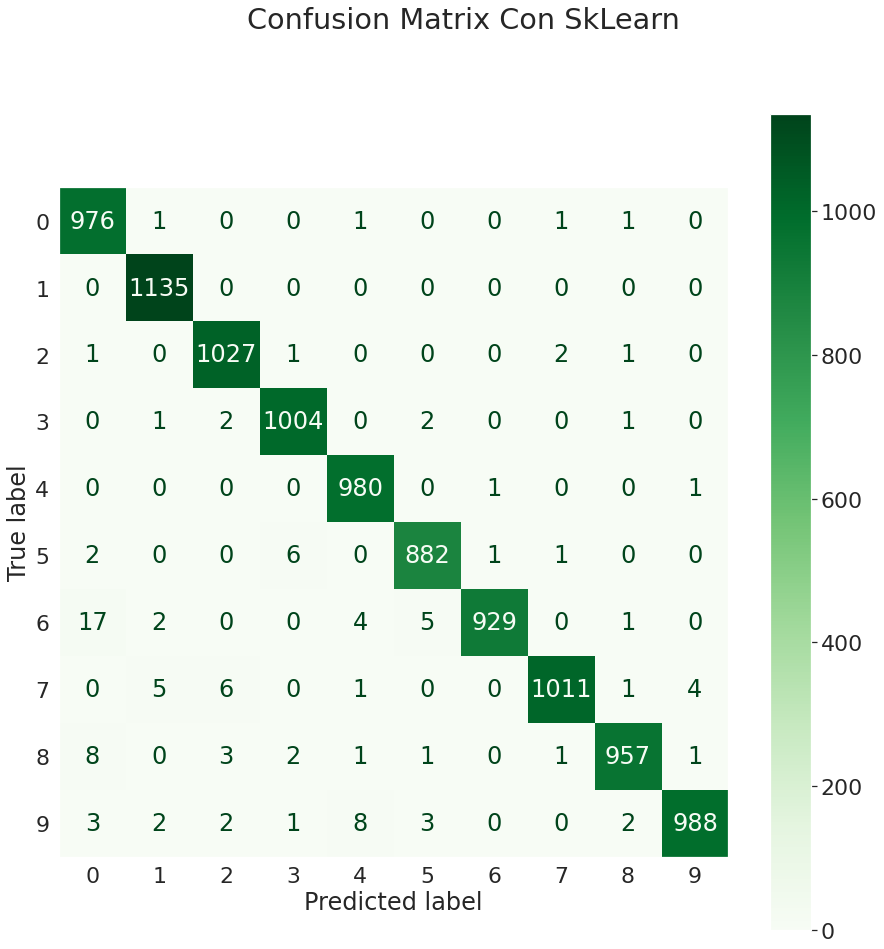

In [ ]:
# construir la matriz de confusión resultante para la predicciones realizadas sobre el datasets
from sklearn.metrics import ConfusionMatrixDisplay
f, ax1 = plt.subplots(figsize=(15,15))
ax1.grid(False)
fig=ConfusionMatrixDisplay.from_predictions(y_true=expected,
                                            y_pred=predicted,
                                            ax=ax1,display_labels=range(10),
                                            cmap="Greens")
fig.figure_.suptitle("Confusion Matrix Con SkLearn")

In [ ]:
#parete 3
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import ModelCheckpoint
import os
print(tf.__version__)

2.8.2


In [ ]:
#Definición de los directorios del dataset
base_dir = '/content/drive/MyDrive/ML/petsDataset'

train_dir =      os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir =       os.path.join(base_dir, 'test')

# Directorio con las imagenes de training 
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
train_parrots_dir = os.path.join(train_dir, 'parrots')

# Directorio con las imagenes de validation
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
validation_parrots_dir = os.path.join(validation_dir, 'parrots')

# Directorio con las imagenes de test
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')
test_parrots_dir = os.path.join(test_dir, 'parrots')

print(os.path.normcase(train_cats_dir))
print(validation_cats_dir)
print(test_cats_dir)

/content/drive/MyDrive/ML/petsDataset/train/cats
/content/drive/MyDrive/ML/petsDataset/validation/cats
/content/drive/MyDrive/ML/petsDataset/test/cats


In [ ]:
#Confección de la lista de imagenes
train_cat_fnames = os.listdir(train_cats_dir )
print(train_cat_fnames[:5])

train_dog_fnames = os.listdir( train_dogs_dir )
print(train_dog_fnames[:5])

train_parrot_fnames = os.listdir( train_parrots_dir )
print(train_parrot_fnames[:5])

validation_cat_fnames = os.listdir( validation_cats_dir )
print(validation_cat_fnames[:5])

validation_dog_fnames = os.listdir( validation_dogs_dir )
print(validation_dog_fnames[:5])

validation_parrot_fnames = os.listdir( validation_parrots_dir )
print(validation_parrot_fnames[:5])

test_cat_fnames = os.listdir( test_cats_dir )
print(test_cat_fnames[:5])

test_dog_fnames = os.listdir( test_dogs_dir )
print(test_dog_fnames[:5])

test_parrot_fnames = os.listdir( test_parrots_dir )
print(test_parrot_fnames[:5])

['cat.692.jpg', 'cat.508.jpg', 'cat.116.jpg', 'cat.385.jpg', 'cat.866.jpg']
['dog.106.jpg', 'dog.626.jpg', 'dog.661.jpg', 'dog.988.jpg', 'dog.507.jpg']
['00001423.jpg', '00001358.jpg', '00001404.jpg', '00001357.jpg', '00001359.jpg']
['n02121620_17577.JPEG', 'n02121620_19100.JPEG', 'n02121620_18001.JPEG', 'n02121620_17856.JPEG', 'n02121620_34554.JPEG']
['n02084071_2048.JPEG', 'n02084071_1992.JPEG', 'n02084071_2030.JPEG', 'n02084071_2074.JPEG', 'n02084071_1967.JPEG']
['00000009.jpg', '00000028.jpg', '00000005.jpg', '00000100.jpg', '00000122.jpg']
['n02121620_4591.JPEG', 'n02121620_4315.JPEG', 'n02121620_4281.JPEG', 'n02121620_4285.JPEG', 'n02121620_4307.JPEG']
['n02084071_25164.JPEG', 'n02084071_24928.JPEG', 'n02084071_24427.JPEG', 'n02084071_25119.JPEG', 'n02084071_24935.JPEG']
['00000069.jpg', '00000026.jpg', '00000068.jpg', '00000171.jpg', '00000123.jpg']


In [ ]:
#Imprimir cantidad de imagenes para cada sección
print('total training cat images :', len(os.listdir(train_cats_dir ) ))
print('total training dog images :', len(os.listdir(train_dogs_dir ) ))
print('total training parrot images :', len(os.listdir(train_parrots_dir ) ))


total training cat images : 1620
total training dog images : 1620
total training parrot images : 1620


In [ ]:
print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))
print('total validation parrot images :', len(os.listdir( validation_parrots_dir ) ))


total validation cat images : 540
total validation dog images : 540
total validation parrot images : 540


In [ ]:
print('total test cat images :', len(os.listdir( test_cats_dir ) ))
print('total test dog images :', len(os.listdir( test_dogs_dir ) ))
print('total test parrot images :', len(os.listdir( test_parrots_dir ) ))

total test cat images : 540
total test dog images : 540
total test parrot images : 540


In [ ]:
#Función para visualizar las imágenes
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

def print_pictures(dir, fnames):
  # presentaremos images en una configuración de 4x4
  nrows = 4
  ncols = 4

  pic_index = 0 # Índice para iterar sobre las imagenes

  fig = plt.gcf()
  fig.set_size_inches(ncols*4, nrows*4)

  pic_index+=8

  next_pix = [os.path.join(dir, fname) 
                for fname in fnames[ pic_index-8:pic_index] 
               ]

  for i, img_path in enumerate(next_pix):
    sp = plt.subplot(nrows, ncols, i + 1)
    img = mpimg.imread(img_path)
    plt.imshow(img)

  plt.show()

  
print("Figura 1")
print_pictures(train_cats_dir, train_cat_fnames)
print("Figura 2")
print_pictures(train_dogs_dir, train_dog_fnames)
print("Figura 3")
print_pictures(train_parrots_dir, train_parrot_fnames)

print("Figura 4")
print_pictures(validation_cats_dir, validation_cat_fnames)
print("Figura 5")
print_pictures(validation_dogs_dir, validation_dog_fnames)
print("Figura 6")
print_pictures(validation_parrots_dir, validation_parrot_fnames)

print("Figura 7")
print_pictures(test_cats_dir, test_cat_fnames)
print("Figura 8")
print_pictures(test_dogs_dir, test_dog_fnames)
print("Figura 9")
print_pictures(test_parrots_dir, test_parrot_fnames)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))
model=Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax'))


58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 3)                 771       
                                                                 
Total params: 16,812,867
Trainable params: 16,812,867
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import RMSprop, Adam
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics = ['acc'])


In [ ]:
from PIL.Image import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1.0/255.)
validation_datagen = ImageDataGenerator(rescale = 1.0/255.)
test_datagen=ImageDataGenerator(rescale=1.0/255.)
train_generator=train_datagen.flow_from_directory(train_dir, batch_size=20, class_mode='categorical',
                                                  target_size=(150, 150))
validation_generator=validation_datagen.flow_from_directory(validation_dir, batch_size=20, class_mode='categorical',
                                                  target_size=(150, 150))
test_generator=test_datagen.flow_from_directory(test_dir, batch_size=20, class_mode='categorical',
                                                  target_size=(150, 150))

Found 4860 images belonging to 3 classes.
Found 1620 images belonging to 3 classes.
Found 1620 images belonging to 3 classes.


In [ ]:
batch_size = 20
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

print (steps_per_epoch)
print (validation_steps)

243
81


In [ ]:
history=model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    verbose=2
)
#Guardar el modelo entrenado
model.save('pets_categorical.h5')

Epoch 1/10
243/243 - 929s - loss: 0.5675 - acc: 0.7420 - val_loss: 0.2160 - val_acc: 0.9173 - 929s/epoch - 4s/step
Epoch 2/10
243/243 - 49s - loss: 0.2685 - acc: 0.8934 - val_loss: 0.2041 - val_acc: 0.9191 - 49s/epoch - 203ms/step
Epoch 3/10
243/243 - 50s - loss: 0.1799 - acc: 0.9317 - val_loss: 0.1625 - val_acc: 0.9364 - 50s/epoch - 204ms/step
Epoch 4/10
243/243 - 49s - loss: 0.1198 - acc: 0.9568 - val_loss: 0.1674 - val_acc: 0.9377 - 49s/epoch - 203ms/step
Epoch 5/10
243/243 - 50s - loss: 0.0893 - acc: 0.9665 - val_loss: 0.2282 - val_acc: 0.9278 - 50s/epoch - 206ms/step
Epoch 6/10
243/243 - 49s - loss: 0.0585 - acc: 0.9788 - val_loss: 0.2291 - val_acc: 0.9148 - 49s/epoch - 203ms/step
Epoch 7/10
243/243 - 49s - loss: 0.0511 - acc: 0.9813 - val_loss: 0.1689 - val_acc: 0.9414 - 49s/epoch - 203ms/step
Epoch 8/10
243/243 - 50s - loss: 0.0450 - acc: 0.9815 - val_loss: 0.2267 - val_acc: 0.9259 - 50s/epoch - 206ms/step
Epoch 9/10
243/243 - 49s - loss: 0.0512 - acc: 0.9829 - val_loss: 0.1746 

In [ ]:
import json
print(train_generator.class_indices)
a_file=open("pets_indices.json","w")
a_file=json.dump(train_generator.class_indices, a_file)
history_dict=history.history
print(history_dict.keys())


{'cats': 0, 'dogs': 1, 'parrots': 2}
dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


Train Accuracy:  [0.7419753074645996, 0.893415629863739, 0.9316872358322144, 0.9567901492118835, 0.9664608836174011, 0.9788065552711487, 0.981275737285614, 0.9814814925193787, 0.982921838760376, 0.9930041432380676]
Train Loss:  [0.5674548149108887, 0.26854071021080017, 0.1798740029335022, 0.11983714252710342, 0.08929078280925751, 0.058464232832193375, 0.05107852816581726, 0.04499096795916557, 0.05124802142381668, 0.02171085588634014]
Validation Accuracy:  [0.9172839522361755, 0.9191358089447021, 0.9364197254180908, 0.9376543164253235, 0.9277777671813965, 0.914814829826355, 0.9413580298423767, 0.9259259104728699, 0.9469135999679565, 0.934567928314209]
Validation Loss:  [0.21598747372627258, 0.20411716401576996, 0.16253821551799774, 0.16739007830619812, 0.2282445877790451, 0.22912882268428802, 0.1689346730709076, 0.22674430906772614, 0.17457708716392517, 0.25923025608062744]


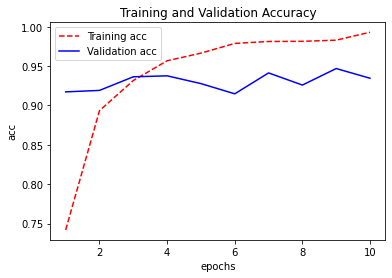

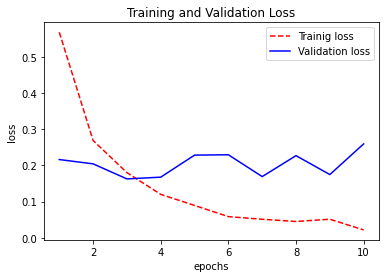

<Figure size 432x288 with 0 Axes>

In [ ]:
acc     = history.history[ 'acc']
val_acc = history.history[ 'val_acc']
loss    = history.history['loss']
val_loss= history.history[ 'val_loss']

epochs = range(1,len(acc)+1,1) #obtener número de epochs del eje x

plt.plot(epochs, acc, 'r--', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r--', label='Trainig loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.figure()
#parte 4.3
print("Train Accuracy: ", acc)
print("Train Loss: ", loss)
print("Validation Accuracy: ", val_acc)
print("Validation Loss: ", val_loss)

In [ ]:
test_steps = test_generator.n // batch_size
test_lost, test_acc = model.evaluate(test_generator, steps=test_steps)
print("Test Accuracy: ", test_acc)


81/81 [==============================] - 370s 5s/step - loss: 0.3055 - acc: 0.9210
Test Accuracy:  0.9209876656532288


[[1.8250150e-17 2.6457418e-27 1.0000000e+00]]
2
parrots


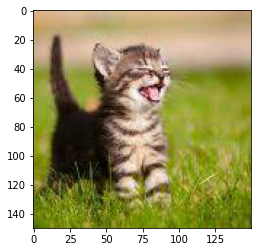

In [ ]:
#parte 4
#Código para hacer inferencia de un modelo entrenado
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
path='/content/drive/MyDrive/ML/petsDataset/test/gato5.jpg'
img=image.load_img(path, target_size=(150, 150))
x=image.img_to_array(img)
image=np.expand_dims(x, axis=0)
import json
a_file = open("pets_indices.json", "r")
class_indices = json.load(a_file)
model = load_model('pets_categorical.h5')
classes = model.predict(image)
print(classes)
clas =np.where(classes[0] == max(classes[0]))
categoria = clas[0][0]
print(categoria)
print(list(class_indices.keys())[list(class_indices.values()).index(categoria)])
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()


In [ ]:
#parte 5 
#Red Neuronal Recurrente entrenada con Alfabeto
import numpy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras import utils
# Fijar semilla para poder reproducir la ejecución
numpy.random.seed(7)
# definir el alfabeto
alphabet = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
# crear un mapeado de caracteres a enteros y viceversa
char_to_int = dict((c, i) for i, c in enumerate(alphabet))
int_to_char = dict((i, c) for i, c in enumerate(alphabet))

In [ ]:
#preparar el dataset agrupando letras (en conjuntos de seq_length)
#y la categoria asignada será la siguiente letra en el alfabeto
#seq_length=3
#parte 5.2
seq_length=5
dataX=[]
dataY=[]
for i in range(0, len(alphabet)-seq_length, 1):
  seq_in = alphabet[i:i + seq_length]
  seq_out = alphabet[i + seq_length]
  dataX.append([char_to_int[char] for char in seq_in])
  dataY.append(char_to_int[seq_out])
  print(seq_in, '--> ',seq_out)


ABCDE -->  F
BCDEF -->  G
CDEFG -->  H
DEFGH -->  I
EFGHI -->  J
FGHIJ -->  K
GHIJK -->  L
HIJKL -->  M
IJKLM -->  N
JKLMN -->  O
KLMNO -->  P
LMNOP -->  Q
MNOPQ -->  R
NOPQR -->  S
OPQRS -->  T
PQRST -->  U
QRSTU -->  V
RSTUV -->  W
STUVW -->  X
TUVWX -->  Y
UVWXY -->  Z


In [ ]:
# reshape X a [samples, time steps, features]
X = numpy.reshape(dataX, (len(dataX), seq_length, 1))
X

array([[[ 0],
        [ 1],
        [ 2],
        [ 3],
        [ 4]],

       [[ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5]],

       [[ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6]],

       [[ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7]],

       [[ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8]],

       [[ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9]],

       [[ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]],

       [[ 7],
        [ 8],
        [ 9],
        [10],
        [11]],

       [[ 8],
        [ 9],
        [10],
        [11],
        [12]],

       [[ 9],
        [10],
        [11],
        [12],
        [13]],

       [[10],
        [11],
        [12],
        [13],
        [14]],

       [[11],
        [12],
        [13],
        [14],
        [15]],

       [[12],
        [13],
        [14],
        [15],
        [16]],

       [[13],
        [14],
        [15],
        [16],
        

In [ ]:
# normalizar
X = X / float(len(alphabet))
# one hot encode 
y = utils.to_categorical(dataY)
print (X.shape[1], X.shape[2])

5 1


In [ ]:
#crear y entrenar el modelo
model = Sequential()
model.add(LSTM(32, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])
#model.fit(X, y, epochs=500, batch_size=1, verbose=2)
#parte 5.1
#model.fit(X, y, epochs=10, batch_size=1, verbose=2)
#parte 5.2
model.fit(X, y, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
21/21 - 1s - loss: 3.2709 - accuracy: 0.0000e+00 - 1s/epoch - 59ms/step
Epoch 2/100
21/21 - 0s - loss: 3.2489 - accuracy: 0.0476 - 57ms/epoch - 3ms/step
Epoch 3/100
21/21 - 0s - loss: 3.2368 - accuracy: 0.0476 - 57ms/epoch - 3ms/step
Epoch 4/100
21/21 - 0s - loss: 3.2245 - accuracy: 0.0476 - 56ms/epoch - 3ms/step
Epoch 5/100
21/21 - 0s - loss: 3.2118 - accuracy: 0.0952 - 55ms/epoch - 3ms/step
Epoch 6/100
21/21 - 0s - loss: 3.1947 - accuracy: 0.0476 - 59ms/epoch - 3ms/step
Epoch 7/100
21/21 - 0s - loss: 3.1777 - accuracy: 0.0476 - 56ms/epoch - 3ms/step
Epoch 8/100
21/21 - 0s - loss: 3.1567 - accuracy: 0.0476 - 59ms/epoch - 3ms/step
Epoch 9/100
21/21 - 0s - loss: 3.1332 - accuracy: 0.0476 - 57ms/epoch - 3ms/step
Epoch 10/100
21/21 - 0s - loss: 3.1005 - accuracy: 0.0476 - 56ms/epoch - 3ms/step
Epoch 11/100
21/21 - 0s - loss: 3.0770 - accuracy: 0.0476 - 55ms/epoch - 3ms/step
Epoch 12/100
21/21 - 0s - loss: 3.0441 - accuracy: 0.0476 - 59ms/epoch - 3ms/step
Epoch 13/100
21/21 - 0

In [ ]:
# Imprimir el desempeño del modelo
scores = model.evaluate(X, y, verbose=0)
print("Model Accuracy: %.2f%%" % (scores[1]*100))

Model Accuracy: 80.95%


In [ ]:
# Ver algunas predicciones del modelo
for pattern in dataX:
    x = numpy.reshape(pattern, (1, len(pattern),1))
    x = x / float(len(alphabet))
    prediction = model.predict(x, verbose=0)
    index = numpy.argmax(prediction)
    result = int_to_char[index]
    seq_in = [int_to_char[value] for value in pattern]
    print (seq_in, "->", result)

['A', 'B', 'C'] -> G
['B', 'C', 'D'] -> Z
['C', 'D', 'E'] -> Z
['D', 'E', 'F'] -> Z
['E', 'F', 'G'] -> Z
['F', 'G', 'H'] -> Z
['G', 'H', 'I'] -> Z
['H', 'I', 'J'] -> Z
['I', 'J', 'K'] -> Z
['J', 'K', 'L'] -> Z
['K', 'L', 'M'] -> Z
['L', 'M', 'N'] -> Z
['M', 'N', 'O'] -> Z
['N', 'O', 'P'] -> Z
['O', 'P', 'Q'] -> Z
['P', 'Q', 'R'] -> Z
['Q', 'R', 'S'] -> Z
['R', 'S', 'T'] -> Z
['S', 'T', 'U'] -> Z
['T', 'U', 'V'] -> Z
['U', 'V', 'W'] -> Z
['V', 'W', 'X'] -> Z
['W', 'X', 'Y'] -> Z


In [ ]:
#parte 6
# Red Neuronal Recurrente entrenada con libros
# Importar Librerías
import tensorflow as tf
from tensorflow import keras

import numpy as np
import os


In [ ]:
import time
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices: tf.config.experimental.set_memory_growth(device, True)

RuntimeError: ignored

In [ ]:
#Carga del conjunto de datos
path_to_fileDL = tf.keras.utils.get_file('Shakespear.txt', 'https://cs.stanford.edu/people/karpathy/char-rnn/shakespear.txt')

114688/99993 [==================================] - 0s 1us/step


In [ ]:
text = open(path_to_fileDL, 'rb').read().decode(encoding='utf-8')
print('Longitud del texto:        {} carácteres'.format(len(text)))

vocab = sorted(set(text))

print ('El texto está compuesto de estos {} carácteres:'.format(len(vocab)))
print (vocab)

Longitud del texto:        99993 carácteres
El texto está compuesto de estos 62 carácteres:
['\n', ' ', '!', "'", ',', '-', '.', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [ ]:
char2idx = {u:i for i, u in enumerate(vocab)}
idx2char = np.array(vocab)

for char,_ in zip(char2idx, range(len(vocab))):
    print('  {:4s}: {:3d},'.format(repr(char), char2idx[char]))

  '\n':   0,
  ' ' :   1,
  '!' :   2,
  "'" :   3,
  ',' :   4,
  '-' :   5,
  '.' :   6,
  ':' :   7,
  ';' :   8,
  '?' :   9,
  'A' :  10,
  'B' :  11,
  'C' :  12,
  'D' :  13,
  'E' :  14,
  'F' :  15,
  'G' :  16,
  'H' :  17,
  'I' :  18,
  'J' :  19,
  'K' :  20,
  'L' :  21,
  'M' :  22,
  'N' :  23,
  'O' :  24,
  'P' :  25,
  'Q' :  26,
  'R' :  27,
  'S' :  28,
  'T' :  29,
  'U' :  30,
  'V' :  31,
  'W' :  32,
  'X' :  33,
  'Y' :  34,
  'Z' :  35,
  'a' :  36,
  'b' :  37,
  'c' :  38,
  'd' :  39,
  'e' :  40,
  'f' :  41,
  'g' :  42,
  'h' :  43,
  'i' :  44,
  'j' :  45,
  'k' :  46,
  'l' :  47,
  'm' :  48,
  'n' :  49,
  'o' :  50,
  'p' :  51,
  'q' :  52,
  'r' :  53,
  's' :  54,
  't' :  55,
  'u' :  56,
  'v' :  57,
  'w' :  58,
  'x' :  59,
  'y' :  60,
  'z' :  61,


In [ ]:
text_as_int = np.array([char2idx[c] for c in text])
print ('texto: {}'.format(repr(text[:50])))
print ('{}'.format(repr(text_as_int[:50])))

texto: "That, poor contempt, or claim'd thou slept so fait"
array([29, 43, 36, 55,  4,  1, 51, 50, 50, 53,  1, 38, 50, 49, 55, 40, 48,
       51, 55,  4,  1, 50, 53,  1, 38, 47, 36, 44, 48,  3, 39,  1, 55, 43,
       50, 56,  1, 54, 47, 40, 51, 55,  1, 54, 50,  1, 41, 36, 44, 55])


In [ ]:
#Preparar los datos para entrenar la RNN
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)

seq_length = 100
 
sequences = char_dataset.batch(seq_length+1, drop_remainder=True)
for item in sequences.take(10):
  print(repr(''.join(idx2char[item.numpy()])))

"That, poor contempt, or claim'd thou slept so faithful,\nI may contrive our father; and, in their defe"
'ated queen,\nHer flesh broke me and puttance of expedition house,\nAnd in that same that ever I lament '
'this stomach,\nAnd he, nor Butly and my fury, knowing everything\nGrew daily ever, his great strength a'
"nd thought\nThe bright buds of mine own.\n\nBIONDELLO:\nMarry, that it may not pray their patience.'\n\nKIN"
'G LEAR:\nThe instant common maid, as we may less be\na brave gentleman and joiner: he that finds us wit'
"h wax\nAnd owe so full of presence and our fooder at our\nstaves. It is remorsed the bridal's man his g"
'race\nfor every business in my tongue, but I was thinking\nthat he contends, he hath respected thee.\n\nB'
"IRON:\nShe left thee on, I'll die to blessed and most reasonable\nNature in this honour, and her bosom "
'is safe, some\nothers from his speedy-birth, a bill and as\nForestem with Richard in your heart\nBe ques'
"tion'd on, nor that I was enough:\nWhic

In [ ]:
def split_input_target(chunk):
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text

dataset = sequences.map(split_input_target)
for input_example, target_example in  dataset.take(1):
  print ('Input data: ', repr(''.join(idx2char[input_example.numpy()])))
  print ('Target data:', repr(''.join(idx2char[target_example.numpy()])))

Input data:  "That, poor contempt, or claim'd thou slept so faithful,\nI may contrive our father; and, in their def"
Target data: "hat, poor contempt, or claim'd thou slept so faithful,\nI may contrive our father; and, in their defe"


In [ ]:
print (dataset)

<MapDataset element_spec=(TensorSpec(shape=(100,), dtype=tf.int64, name=None), TensorSpec(shape=(100,), dtype=tf.int64, name=None))>


In [ ]:
BATCH_SIZE = 64

BUFFER_SIZE = 10000

dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

print (dataset)

<BatchDataset element_spec=(TensorSpec(shape=(64, 100), dtype=tf.int64, name=None), TensorSpec(shape=(64, 100), dtype=tf.int64, name=None))>


In [ ]:
#Construcción del modelo
vocab_size = len(vocab)
embedding_dim = 256
rnn_units = 1024

In [ ]:
from google.colab import output
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
  model=Sequential()
  model.add(Embedding(input_dim=vocab_size,
                      output_dim=embedding_dim,
                      batch_input_shape=[batch_size, None]))
  model.add(LSTM(rnn_units,
                 return_sequences=True,
                 stateful=True,
                 recurrent_initializer='glorot_uniform'))
  model.add(Dense(vocab_size))
  return model


In [ ]:
#creación del modelo
model=build_model(
    vocab_size=len(vocab),
    embedding_dim=embedding_dim,
    rnn_units=rnn_units,
    batch_size=BATCH_SIZE
)

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (64, None, 256)           15872     
                                                                 
 lstm_3 (LSTM)               (64, None, 1024)          5246976   
                                                                 
 dense_5 (Dense)             (64, None, 62)            63550     
                                                                 
Total params: 5,326,398
Trainable params: 5,326,398
Non-trainable params: 0
_________________________________________________________________


In [ ]:
for input_example_batch, target_example_batch in dataset.take(1):
  print("Input:", input_example_batch.shape, "# (batch_size, sequence_length)")
  print("Target:", target_example_batch.shape, "# (batch_size, sequence_length)")

Input: (64, 100) # (batch_size, sequence_length)
Target: (64, 100) # (batch_size, sequence_length)


In [ ]:
for input_example_batch, target_example_batch in dataset.take(1):  
    example_batch_predictions = model(input_example_batch)
    print("Prediction: ", example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")

Prediction:  (64, 100, 62) # (batch_size, sequence_length, vocab_size)


In [ ]:
sampled_indices = tf.random.categorical(example_batch_predictions[0], num_samples=1)
sampled_indices_characters = tf.squeeze(sampled_indices,axis=-1).numpy()
sampled_indices_characters

array([36, 56, 16, 52, 27, 58, 58, 25, 53, 30, 40, 13, 53, 55, 41,  0,  8,
       56, 33, 27, 38, 21, 20, 53, 13, 29, 24,  2, 11, 25, 34, 16, 16, 51,
       34, 31, 35,  9, 17,  1, 16, 41, 12, 22, 24, 31, 29, 27, 34, 16, 31,
       11, 28, 36, 44, 38,  3, 36, 34, 42, 25, 41,  2, 12, 32,  8, 53, 19,
       11, 34, 57, 42, 13,  1, 39,  1, 10, 52, 12,  9,  2, 30, 25, 37, 32,
       30, 34, 17, 51, 51, 59, 59, 61, 37, 56, 42, 49, 34,  5, 11])

In [ ]:
#entrenar el modelo
def loss(labels, logits):
  return tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)


In [ ]:
model.compile(optimizer='adam', loss=loss)

In [ ]:
#configurar el checkpoints
# directorio
checkpoint_dir = './training_checkpoints'
# nombre fichero
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)

In [ ]:
#entrenamiento del modelo
EPOCHS=10
history=model.fit(dataset, epochs=EPOCHS,
                  callbacks=[checkpoint_callback])


Epoch 1/10
15/15 [==============================] - 3s 75ms/step - loss: 3.4987
Epoch 2/10
15/15 [==============================] - 1s 72ms/step - loss: 3.2205
Epoch 3/10
15/15 [==============================] - 1s 71ms/step - loss: 3.0617
Epoch 4/10
15/15 [==============================] - 1s 75ms/step - loss: 2.7141
Epoch 5/10
15/15 [==============================] - 1s 74ms/step - loss: 2.4832
Epoch 6/10
15/15 [==============================] - 1s 73ms/step - loss: 2.3713
Epoch 7/10
15/15 [==============================] - 1s 78ms/step - loss: 2.2927
Epoch 8/10
15/15 [==============================] - 1s 73ms/step - loss: 2.2241
Epoch 9/10
15/15 [==============================] - 1s 76ms/step - loss: 2.1627
Epoch 10/10
15/15 [==============================] - 1s 73ms/step - loss: 2.1063


In [ ]:
#generación de texto
tf.train.latest_checkpoint(checkpoint_dir)

'./training_checkpoints/ckpt_10'

In [ ]:
model = build_model(vocab_size, embedding_dim, rnn_units, batch_size=1)

model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))

model.build(tf.TensorShape([1, None]))

In [ ]:
def generate_text(model, start_string):

  num_generate = 500
  input_eval = [char2idx[s] for s in start_string]

  input_eval = tf.expand_dims(input_eval, 0)
  text_generated = []


  temperature = 0.5

  model.reset_states()
  for i in range(num_generate):
      predictions = model(input_eval)
      
      predictions = tf.squeeze(predictions, 0)

      predictions = predictions / temperature
      predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()


      input_eval = tf.expand_dims([predicted_id], 0)

      text_generated.append(idx2char[predicted_id])

  return (start_string + ''.join(text_generated))

In [ ]:
print(generate_text(model, start_string=u"c"))

cheit the wall the thee I and whin the paigh and the theat the laded the willade are ald I wall we fore the frith the fadint that the ceast gathen shere thain the rear of ead of there hath be the mand hour thour hear,
I whell has have ast lo dang, with the sactert of the thath and and of thee the touther seerem the wist thing will the the gore the becone so dise soms,
What the praike of tha will the fraiss,
What how the hare and in the sanken woll the sand of the the with thee the wood she the th


In [ ]:
#parte 7
# Generative Adversarial Networks (GANs)
#configuración inicial
'''Main'''
import numpy as np
import pandas as pd
import os, time, re
import pickle, gzip, datetime

'''Data Viz'''
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import Grid
from IPython.display import SVG
%matplotlib inline

'''Data Prep and Model Evaluation'''
from sklearn import preprocessing as pp
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import log_loss, accuracy_score
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, mean_squared_error

'''Algos'''
import lightgbm as lgb

'''TensorFlow and Keras'''
import tensorflow as tf
from tensorflow import keras
K = keras.backend

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization, Input, Lambda
from tensorflow.keras.layers import Embedding, Flatten, dot
from tensorflow.keras.layers import Conv2D, MaxPool2D, LeakyReLU, Reshape
from tensorflow.keras.layers import UpSampling2D, Conv2DTranspose
from tensorflow.keras import regularizers
from tensorflow.keras.losses import mse, binary_crossentropy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop
#versiones de las librerías
import sys, sklearn
print(f'sklearn    {sklearn.__version__}')
print(f'tensorflow {tf.__version__}')
print(f'keras      {keras.__version__}')
print(f'numpy      {np.__version__}')

sklearn    1.0.2
tensorflow 2.8.2
keras      2.8.0
numpy      1.21.6


In [ ]:
# Valores semilla para la estabilización de los resultados en diferentes momentos
tf.random.set_seed(42)
np.random.seed(42)

In [ ]:
# Verificar GPU
if tf.test.gpu_device_name(): 
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
   print("Please install GPU version of TF, if GPU is available.")

Default GPU Device: /device:GPU:0


In [ ]:
#data preparation
# Cargar datasets
current_path = os.getcwd()
file = os.path.sep.join(['/drive/MyDrive/ML/datasets','mnist.pkl.gz'])
f = gzip.open(current_path+file, 'rb')
train_set, validation_set, test_set = pickle.load(f, encoding='latin1')
f.close()

X_train, y_train = train_set[0], train_set[1]
X_validation, y_validation = validation_set[0], validation_set[1]
X_test, y_test = test_set[0], test_set[1]

In [ ]:
# Reshape para utilizar los datos con TensorFlow
X_train_keras = X_train.reshape(50000,28,28,1)
X_validation_keras = X_validation.reshape(10000,28,28,1)
X_test_keras = X_test.reshape(10000,28,28,1)

y_train_keras = to_categorical(y_train)
y_validation_keras = to_categorical(y_validation)
y_test_keras = to_categorical(y_test)

In [ ]:
# Creación de  Pandas DataFrames para el dataset
train_index = range(0,len(X_train))
validation_index = range(len(X_train),len(X_train)+len(X_validation))
test_index = range(len(X_train)+len(X_validation),len(X_train)+ \
                   len(X_validation)+len(X_test))

X_train = pd.DataFrame(data=X_train,index=train_index)
y_train = pd.Series(data=y_train,index=train_index)

X_validation = pd.DataFrame(data=X_validation,index=validation_index)
y_validation = pd.Series(data=y_validation,index=validation_index)

X_test = pd.DataFrame(data=X_test,index=test_index)
y_test = pd.Series(data=y_test,index=test_index)

In [ ]:
# Definición de una función para visualizar los dígitos
def view_digit(X, y, example):
    label = y.loc[example]
    image = X.loc[example,:].values.reshape([28,28])
    plt.title('Example: %d  Label: %d' % (example, label))
    plt.imshow(image, cmap=plt.get_cmap('gray'))
    plt.show()

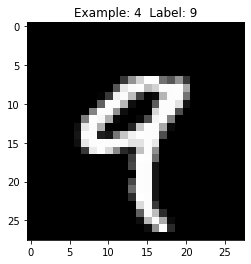

In [ ]:
# Graficar el primer dígito
view_digit(X_train, y_train, 4)

In [ ]:
#Deep Convolutional Generative Adversarial Network (DCGAN)
# Definición de la función para el desarrollo del modelo
class ElapsedTimer(object):
    def __init__(self):
        self.start_time = time.time()
    def elapsed(self,sec):
        if sec < 60:
            return str(sec) + " sec"
        elif sec < (60 * 60):
            return str(sec / 60) + " min"
        else:
            return str(sec / (60 * 60)) + " hr"
    def elapsed_time(self):
        print("Elapsed: %s " % self.elapsed(time.time() - self.start_time))

class DCGAN(object):
    def __init__(self, img_rows=28, img_cols=28, channel=1):

        self.img_rows = img_rows
        self.img_cols = img_cols
        self.channel = channel
        self.D = None   # discriminador
        self.G = None   # generator
        self.AM = None  # modelo adversarial
        self.DM = None  # modelo discriminador 
        
    def generator(self, depth=256, dim=7, dropout=0.3, momentum=0.8, \
                  window=5, input_dim=100, output_depth=1):
        if self.G:
            return self.G
        self.G = Sequential()
        self.G.add(Dense(dim*dim*depth, input_dim=input_dim))
        self.G.add(BatchNormalization(momentum=momentum))
        self.G.add(Activation('relu'))
        self.G.add(Reshape((dim, dim, depth)))
        self.G.add(Dropout(dropout))
        
        self.G.add(UpSampling2D())
        self.G.add(Conv2DTranspose(int(depth/2), window, padding='same'))
        self.G.add(BatchNormalization(momentum=momentum))
        self.G.add(Activation('relu'))

        self.G.add(UpSampling2D())
        self.G.add(Conv2DTranspose(int(depth/4), window, padding='same'))
        self.G.add(BatchNormalization(momentum=momentum))
        self.G.add(Activation('relu'))

        self.G.add(Conv2DTranspose(int(depth/8), window, padding='same'))
        self.G.add(BatchNormalization(momentum=momentum))
        self.G.add(Activation('relu'))

        self.G.add(Conv2DTranspose(output_depth, window, padding='same'))
        self.G.add(Activation('sigmoid'))
        self.G.summary()
        return self.G

    def discriminator(self, depth=64, dropout=0.3, alpha=0.3):
        if self.D:
            return self.D
        self.D = Sequential()
        input_shape = (self.img_rows, self.img_cols, self.channel)
        self.D.add(Conv2D(depth*1, 5, strides=2, input_shape=input_shape,
            padding='same'))
        self.D.add(LeakyReLU(alpha=alpha))
        self.D.add(Dropout(dropout))

        self.D.add(Conv2D(depth*2, 5, strides=2, padding='same'))
        self.D.add(LeakyReLU(alpha=alpha))
        self.D.add(Dropout(dropout))

        self.D.add(Conv2D(depth*4, 5, strides=2, padding='same'))
        self.D.add(LeakyReLU(alpha=alpha))
        self.D.add(Dropout(dropout))

        self.D.add(Conv2D(depth*8, 5, strides=1, padding='same'))
        self.D.add(LeakyReLU(alpha=alpha))
        self.D.add(Dropout(dropout))

        self.D.add(Flatten())
        self.D.add(Dense(1))
        self.D.add(Activation('sigmoid'))
        self.D.summary()
        return self.D

    def discriminator_model(self):
        # Bloque 1
        if self.DM:
          return self.DM
        optimizer=RMSprop(lr=0.0002, decay=6e-8)
        self.DM=Sequential()
        self.DM.add(self.discriminator())
        self.DM.compile(loss='binary_crossentropy', \
                        optimizer=optimizer, metrics=['accuracy'])
        return self.DM

    def adversarial_model(self):
        # Bloque 2
        if self.AM:
          return self.AM
        optimizer=RMSprop(lr=0.0002, decay=3e-8)
        self.AM=Sequential()
        self.AM.add(self.generator())
        self.AM.add(self.discriminator())
        self.AM.compile(loss='binary_crossentropy', \
                        optimizer=optimizer, metrics=['accuracy'])
        return self.AM
        
class MNIST_DCGAN(object):
    def __init__(self, x_train):
        self.img_rows = 28
        self.img_cols = 28
        self.channel = 1

        self.x_train = x_train

        self.DCGAN = DCGAN()
        self.discriminator =  self.DCGAN.discriminator_model()
        self.adversarial = self.DCGAN.adversarial_model()
        self.generator = self.DCGAN.generator()

    def train(self, train_steps=2000, batch_size=256, save_interval=0):
        noise_input = None
        if save_interval>0:
            noise_input = np.random.uniform(-1.0, 1.0, size=[16, 100])
        for i in range(train_steps):
            images_train = self.x_train[np.random.randint(0,
                self.x_train.shape[0], size=batch_size), :, :, :]
            noise = np.random.uniform(-1.0, 1.0, size=[batch_size, 100])
            images_fake = self.generator.predict(noise)
            x = np.concatenate((images_train, images_fake))
            y = np.ones([2*batch_size, 1])
            y[batch_size:, :] = 0
            
            d_loss = self.discriminator.train_on_batch(x, y)

            y = np.ones([batch_size, 1])
            noise = np.random.uniform(-1.0, 1.0, size=[batch_size, 100])
            a_loss = self.adversarial.train_on_batch(noise, y)
            log_mesg = "%d: [D loss: %f, acc: %f]" % (i, d_loss[0], d_loss[1])
            log_mesg = "%s  [A loss: %f, acc: %f]" % (log_mesg, a_loss[0], \
                                                      a_loss[1])
            print(log_mesg)
            if save_interval>0:
                if (i+1)%save_interval==0:
                    self.plot_images(save2file=True, \
                        samples=noise_input.shape[0],\
                        noise=noise_input, step=(i+1))

    def plot_images(self, save2file=False, fake=True, samples=16, \
                    noise=None, step=0):
        #current_path = os.getcwd()
        #file = os.path.sep.join(['', 'images', 'chapter12', 'synthetic_mnist', ''])
        filename = 'mnist.png'
        if fake:
            if noise is None:
                noise = np.random.uniform(-1.0, 1.0, size=[samples, 100])
            else:
                filename = "mnist_%d.png" % step
            images = self.generator.predict(noise)
        else:
            i = np.random.randint(0, self.x_train.shape[0], samples)
            images = self.x_train[i, :, :, :]

        plt.figure(figsize=(10,10))
        for i in range(images.shape[0]):
            plt.subplot(4, 4, i+1)
            image = images[i, :, :, :]
            image = np.reshape(image, [self.img_rows, self.img_cols])
            plt.imshow(image, cmap='gray')
            plt.axis('off')
        plt.tight_layout()
        if save2file:
            plt.savefig(filename) #current_path+file+
            plt.close('all')
        else:
            plt.show()

In [ ]:
#inicializar el modelo DCGAN MNIST
mnist_dcgan= MNIST_DCGAN(X_train_keras)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 64)        1664      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 14, 14, 64)        0         
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 128)         204928    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 7, 7, 128)         0         
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 128)         0         
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 256)        

In [ ]:
#entrenar el modelo
timer = ElapsedTimer()
mnist_dcgan.train(train_steps=1000,
                  batch_size=256,
                  save_interval=500)

0: [D loss: 0.691399, acc: 0.570312]  [A loss: 1.351358, acc: 0.000000]
1: [D loss: 0.697466, acc: 0.500000]  [A loss: 0.740048, acc: 0.003906]
2: [D loss: 0.670370, acc: 0.500000]  [A loss: 0.597633, acc: 1.000000]
3: [D loss: 0.565857, acc: 0.500000]  [A loss: 0.304822, acc: 1.000000]
4: [D loss: 0.449642, acc: 0.500000]  [A loss: 0.108407, acc: 1.000000]
5: [D loss: 0.334454, acc: 1.000000]  [A loss: 0.001992, acc: 1.000000]
6: [D loss: 0.240882, acc: 1.000000]  [A loss: 0.000894, acc: 1.000000]
7: [D loss: 0.147759, acc: 1.000000]  [A loss: 0.000509, acc: 1.000000]
8: [D loss: 0.081471, acc: 0.998047]  [A loss: 0.000022, acc: 1.000000]
9: [D loss: 0.047790, acc: 0.998047]  [A loss: 0.000051, acc: 1.000000]
10: [D loss: 0.040517, acc: 0.996094]  [A loss: 0.000000, acc: 1.000000]
11: [D loss: 0.030635, acc: 1.000000]  [A loss: 0.000028, acc: 1.000000]
12: [D loss: 0.018272, acc: 1.000000]  [A loss: 0.000000, acc: 1.000000]
13: [D loss: 0.018324, acc: 1.000000]  [A loss: 0.000004, acc